In [ ]:
#Earlier we saw that how to perform

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [25]:
df=pd.read_csv('winequality-red.csv',sep=';')
df2=pd.read_csv('winequality-white.csv',sep=';')

In [26]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [27]:
df2['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [28]:
data=df.append(df2)

In [29]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

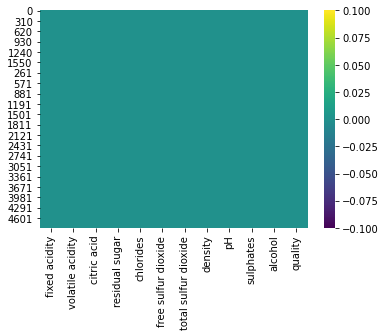

In [31]:
sns.heatmap(data.isnull(),cmap='viridis')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
def outlierdetector(X,mu,sigma):

  z=np.abs((X-mu)/sig)
  if(z<=3):
    pass
  else:
    X=mu
      
  return X



    

In [35]:
for i in data.columns[:-1]:
  mu=np.mean(data[i])
  sig=np.std(data[i])
  data[i]=data[i].apply(lambda x:outlierdetector(x,mu,sig))

In [36]:
data['fixed acidity']

0       7.400000
1       7.800000
2       7.800000
3       7.215307
4       7.400000
          ...   
4893    6.200000
4894    6.600000
4895    6.500000
4896    5.500000
4897    6.000000
Name: fixed acidity, Length: 6497, dtype: float64

In [37]:
bins=(2,6.5,9)

In [38]:
value=['bad','good']

In [39]:
data['quality']=pd.cut(data['quality'],bins=bins,labels=value)

In [40]:
#Now we converted the wine quality into two thing good or bad 

In [41]:
#Now encoding the good and bad values

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
lb=LabelEncoder()


In [46]:
y=data['quality']
data['quality']=lb.fit_transform(y)

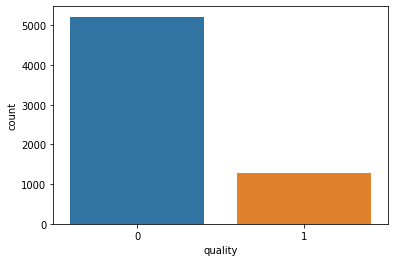

In [47]:
sns.countplot(data['quality'])

In [48]:
#It is clearly visible class is imbalanced 

In [49]:
#Now balanceing the class using SMOTETOmek sampler

In [80]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler


In [81]:
sm=RandomOverSampler(ratio=1)

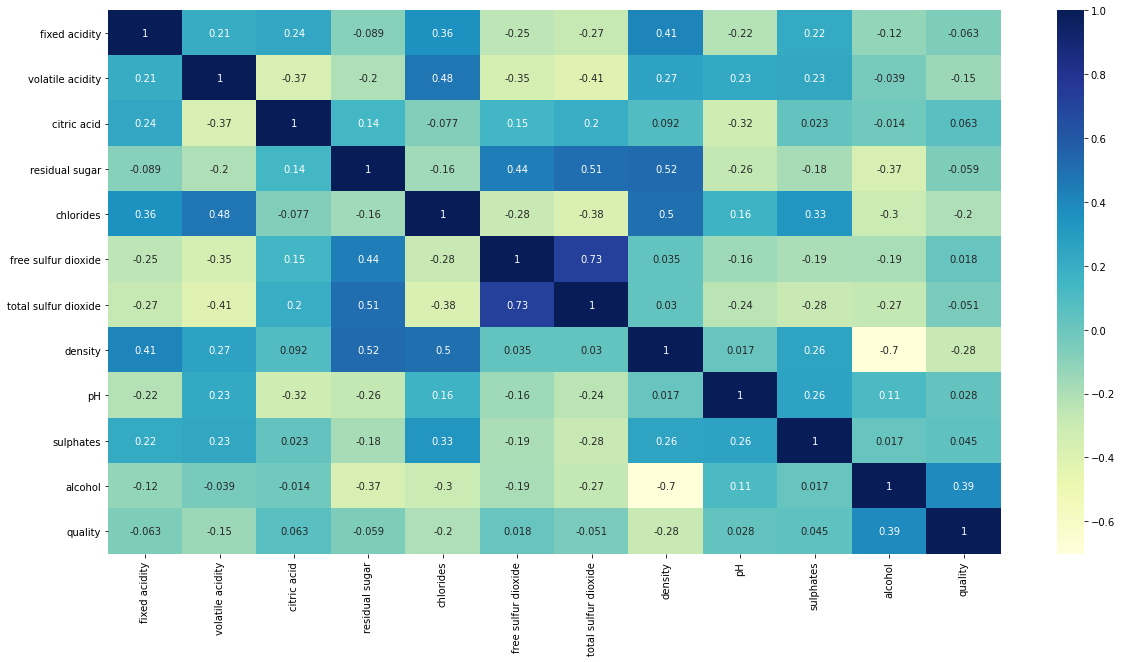

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(method='pearson'),annot=True,cmap='YlGnBu')

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [84]:
from sklearn.preprocessing import StandardScaler


In [132]:
scaler=StandardScaler()
#only alcohol is correlated(good) with quality and total sulfur dioxide is correlated with free sulfur dioxide
X=data.drop(['quality','density','total sulfur dioxide'],axis=1)
y=data['quality']

In [154]:
from sklearn.ensemble import RandomForestClassifier
logmodel=RandomForestClassifier(n_estimators=100,random_state=10)

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)
X_res,y_res=sm.fit_sample(X_train,y_train)
y_res.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(8340,)

In [156]:
X_train=scaler.fit_transform(X_res)
y_train=y_res
X_test=scaler.transform(X_test)


In [157]:
logmodel.fit(X_train,y_train)
pred=logmodel.predict(X_test)

In [158]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1050
           1       0.72      0.63      0.67       250

    accuracy                           0.88      1300
   macro avg       0.82      0.79      0.80      1300
weighted avg       0.88      0.88      0.88      1300

